In [402]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from pyproj import Proj, transform
import folium
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')
import re
from shapely.geometry import Point, Polygon, MultiPolygon
import pickle
from haversine import haversine
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

In [816]:
# dong pkl 파일 로드
with open('temp(dong).pkl', 'rb') as f:
    dong = pickle.load(f) 
dong

,level_0,index,addr_name_gu,addr_name_dong,addr_code,x,y,poly_type,polygon,locate_new,locate_old,locate_restaurant,locate_restaurant_total,density,locate_restaurant_closing,locate_restaurant_closing_category
0,0,0,강남구,개포1동,1123068,137.083527,28.291943,Polygon,"[(127.058262005097, 37.48473924045432), (127.0...",[2110993],NaN,"[(23499457, 0), (17131741, 0), (20482063, 8), ...","[(37.4832728348861, 127.054375095471, 23499457...",7.428571,"[(37.48001833815736, 127.06117792010166, 15695...","[(156954, 3), (711609, 0)]"
1,1,1,강남구,개포2동,1123080,137.091733,28.296745,Polygon,"[(127.07276621452564, 37.49190758430041), (127...","[2110994, 2130310]","[1001475, 1000892, 1000928]","[(20484278, 3), (25504231, 0), (15479972, 2), ...","[(37.4888476666906, 127.067636863204, 20484278...",3.928011,"[(37.48814982043075, 127.07433058645083, 13281...","[(132811, 0), (151859, 0), (235430, 0), (24216..."
2,2,2,강남구,개포4동,1123071,137.080225,28.285083,Polygon,"[(127.05175940694477, 37.48479324866259), (127...","[2110981, 2110977, 2110983, 2110984, 2110980, ...","[1000889, 1000890, 1000895, 1000891, 1000903, ...","[(20026781, 0), (23205621, 5), (25841198, 0), ...","[(37.4777507521333, 127.047819226133, 20026781...",3.724813,"[(37.480061145892, 127.0458295798473, 5345), (...","[(5345, 9), (663383, 0), (706757, 0), (708927,..."
3,3,3,강남구,논현1동,1123052,137.119134,28.261237,Polygon,"[(127.0245113543698, 37.50448575253878), (127....","[2110950, 2110952, 2110953, 2110955, 2120178, ...","[1000896, 1000897, 1000898, 1000938, 1000886, ...","[(20694126, 1), (20024580, 7), (15500579, 0), ...","[(37.510850793909, 127.021869480819, 20694126)...",2.344868,"[(37.508162693228286, 127.030198819818, 806), ...","[(806, 5), (2133, 9), (2722, 0), (3965, 0), (5..."
4,4,4,강남구,논현2동,1123053,137.123537,28.268627,Polygon,"[(127.03471848932787, 37.507565199603214), (12...","[2110966, 2110970, 2110968, 2110961, 2110957, ...","[1000936, 1000924, 1000926, 1000907, 1000908, ...","[(25363926, 1), (20027263, 0), (20379364, 0), ...","[(37.5217387643908, 127.037621922455, 25363926...",1.556067,"[(37.51570214150151, 127.03724037416016, 628),...","[(628, 9), (676, 0), (1178, 2), (1417, 9), (14..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,404,404,중구,중림동,1102068,137.165886,28.210413,Polygon,"[(126.9700057920628, 37.56197371744504), (126....",[2120018],[1001285],"[(16095832, 0), (20480938, 1), (25330385, 1), ...","[(37.5583985853813, 126.965765624561, 16095832...",4.253463,"[(37.55623930640094, 126.96528228818936, 3782)...","[(3782, 9), (235667, 5), (790256, 5), (798709,..."
405,405,405,중구,청구동,1102072,137.169434,28.248742,Polygon,"[(127.01623805512705, 37.55934349966869), (127...",[2110054],"[1000043, 1000034]","[(20468954, 0), (20778056, 7), (25787018, 8), ...","[(37.5559547298335, 127.011818363767, 20468954...",5.477680,"[(37.5565482433501, 127.01463193438948, 1077),...","[(1077, 0), (1078, 0), (308578, 3), (434054, 3..."
406,406,406,중구,필동,1102057,137.167033,28.232372,Polygon,"[(126.99145018675534, 37.56327940446108), (126...","[2110043, 2110042, 2120032, 2130034]","[1000046, 1001192, 1001199]","[(20660147, 5), (15523914, 2), (15518460, 0), ...","[(37.5625287427188, 127.000684189012, 20660147...",3.466863,"[(37.561122288791175, 126.9944557289462, 23200...","[(232008, 4), (232501, 5), (237492, 9), (79059..."
407,407,407,중구,황학동,1102067,137.182873,28.252484,Polygon,"[(127.02313682540297, 37.57196080915371), (127...","[2110055, 2110057, 2130054, 2130055, 2130052]","[1000028, 1000029, 1001284]","[(16173619, 1), (16518825, 1), (20478568, 2), ...","[(37.5688052133752, 127.02065930378, 16173619)...",4.648250,"[(37.5715507853954, 127.0214453458422, 795861)...","[(795861, 6), (826609, 9), (938131, 8), (10798..."


In [18]:
# 미사용 
# 밀집도 pkl 파일 로드
with open('density.pkl', 'rb') as f:
    density = pickle.load(f)

In [19]:
# 미사용
# 폐업 밀집도 pkl 파일 로드
with open('density_close.pkl', 'rb') as f:
    density_close = pickle.load(f)

In [20]:
# 레스토랑 pkl 파일 로드
with open('restaurant.pkl', 'rb') as f:
    restaurant = pickle.load(f)

In [21]:
# 레스토랑_폐업업체 pkl 파일 로드
with open('restaurant_closing.pkl', 'rb') as f:
    restaurant_closing = pickle.load(f)

In [22]:
# 폐업업체 오픈업체 거리차이 pkl 파일 로드
with open('density_close_to_open.pkl', 'rb') as f:
    density_close_to_open = pickle.load(f)

In [23]:
# 폐업업체 오픈업체 합산 거리차이 pkl 파일 로드
with open('total_density.pkl', 'rb') as f:
    total_density = pickle.load(f)

In [24]:
# 미사용 
# 매출데이터
with open('sale_total.pkl', 'rb') as f:
    sale_total = pickle.load(f)

In [569]:
# 매출데이터
with open('total_sale.pkl', 'rb') as f:
    total_sale = pickle.load(f)

In [26]:
# 동인구정보 pkl 파일 로드
with open('dong_popInfo.pkl', 'rb') as f:
    popInfo = pickle.load(f)
'''
adm_cd 행정구역 코드
adm_nm 행정구역 이름
apart_per 아파트 비율
resid_ppltn_per 거주인구 비율
job_ppltn_per 직장인구 비율
one_person_family_per 1인가구 비율
sixty_five_more_ppltn_per 65세이상인구 비율
twenty_ppltn_per 20대인구 비율
'''
popInfo = popInfo[['adm_cd','twenty_ppltn_per','one_person_family_per','resid_ppltn_per','sixty_five_more_ppltn_per','apart_per','job_ppltn_per']]

In [13]:
# 동데이터, 동인구정보 데이터 합치기
dong = pd.concat([dong,popInfo], axis=1)

In [14]:
# 컬럼 생성
restaurant[['twenty_ppltn_per','one_person_family_per', 
            'resid_ppltn_per', 'sixty_five_more_ppltn_per','apart_per', 'job_ppltn_per']] = '입력없음'
restaurant_closing[['twenty_ppltn_per','one_person_family_per', 
            'resid_ppltn_per', 'sixty_five_more_ppltn_per','apart_per', 'job_ppltn_per']] = '입력없음'

In [15]:
# dong 평균 인구 및 주거 데이터 컬럼 입력
row_list = []
col_list = ['twenty_ppltn_per','one_person_family_per', 'resid_ppltn_per', 'sixty_five_more_ppltn_per','apart_per', 'job_ppltn_per']
for i in range(len(dong)):
    open_list = dong['locate_restaurant_total'][i]
    close_list = dong['locate_restaurant_closing'][i]
    twenty = dong['twenty_ppltn_per'][i]
    one_family = dong['one_person_family_per'][i]
    resid = dong['resid_ppltn_per'][i]
    sixty_five = dong['sixty_five_more_ppltn_per'][i]
    apart = dong['apart_per'][i]
    job = dong['job_ppltn_per'][i]
    if open_list != '일치없음':
        for j in range(0, len(open_list)):
            no = open_list[j][2]
            if (restaurant['상가업소번호']==no).any():
                idx = restaurant[restaurant['상가업소번호'] == no].index[0]
                restaurant['twenty_ppltn_per'][idx] = twenty
                restaurant['one_person_family_per'][idx] = one_family
                restaurant['resid_ppltn_per'][idx] = resid
                restaurant['sixty_five_more_ppltn_per'][idx] = sixty_five
                restaurant['apart_per'][idx] = apart
                restaurant['job_ppltn_per'][idx] = job
    if close_list != '일치없음':
        for k in range(0, len(close_list)):
            no = close_list[k][2]
            if (restaurant_closing['번호']==no).any():
                idx = restaurant_closing[restaurant_closing['번호'] == no].index[0]
                restaurant_closing['twenty_ppltn_per'][idx] = twenty
                restaurant_closing['one_person_family_per'][idx] = one_family
                restaurant_closing['resid_ppltn_per'][idx] = resid
                restaurant_closing['sixty_five_more_ppltn_per'][idx] = sixty_five
                restaurant_closing['apart_per'][idx] = apart
                restaurant_closing['job_ppltn_per'][idx] = job

In [16]:
# 인덱스 초기화
restaurant.reset_index(inplace=True)
restaurant_closing.reset_index(inplace=True)

In [802]:
# 폐업하지 않은 레스토랑 밀집도 입력
restaurant['density'] = '없음'
restaurant['density_OtoC'] = '없음'
for i in range(0,len(restaurant)):
    no = restaurant['상가업소번호'][i]
    length_level = np.array(total_density[(total_density['start_point'] == no) | (total_density['goal_point'] == no)]['length_level'])
    length_level_close = np.array(density_close_to_open[density_close_to_open['goal_point'] == no]['length_level'])
    # 가중평균구하기
    if len(length_level) != 0:
        weight = np.full_like(length_level, sum(length_level)/len(length_level))
        restaurant['density'][i] = np.mean(weight)
    if len(length_level_open) != 0:
        weight_open = np.full_like(length_level_open, sum(length_level_open)/len(length_level_open))
        restaurant['density_OtoC'][i] = np.mean(weight_open)

In [803]:
# 폐업한 레스토랑 밀집도 입력
restaurant_closing['density'] = '없음'
restaurant_closing['density_OtoC'] = '없음'
conf = []
for i in range(0,len(restaurant_closing)):
    no = restaurant_closing['번호'][i]
    length_level = np.array(total_density[(total_density['start_point']==no) | (total_density['goal_point']==no)]['length_level'])
    length_level_open = np.array(density_close_to_open[density_close_to_open['start_point'] == no]['length_level'])
    # 가중평균구하기
    if len(length_level) != 0:
        weight_open = np.full_like(length_level, sum(length_level)/len(length_level))
        restaurant_closing['density'][i] = np.mean(weight)
        temp = [np.mean(weight)]
        conf.append(temp)
    if len(length_level_open) != 0:
        weight_open = np.full_like(length_level_open, sum(length_level_open)/len(length_level_open))
        restaurant_closing['density_OtoC'][i] = np.mean(weight_open)
        temp = [np.mean(weight)]
        conf.append(temp)

In [811]:
'''
중분류 코드 숫자화
한식 : 0
디저트/카페 : 1   
유흥주점 : 2
분식 : 3 
일식/수산물 : 4
양식 : 5
닭/오리요리 : 6
패스트푸드 : 7
중식 : 8
기타요리업종 : 9
부페 : 10
'''
'''
mid_list = list(restaurant_closing['업태구분명'].value_counts().index)
for i in mid_list:
    if i == '한식': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 0
    if i == '디저트/카페': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 1
    if i == '유흥주점': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 2
    if i == '분식': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 3
    if i == '일식/수산물': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 4
    if i == '양식': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 5
    if i == '닭/오리요리': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 6
    if i == '패스트푸드': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 7
    if i == '중식': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 8
    if i == '기타요리업종': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 9
    if i == '부페': 
        restaurant_closing.loc[restaurant_closing['업태구분명'] == i, '업태구분명'] = 10
restaurant_closing['업태구분명'].value_counts().index
'''

Int64Index([0, 9, 6, 5, 3, 4, 8, 2, 1, 7, 10], dtype='int64')

In [853]:
# 폐업매장과의 밀집도에서 입력받은 데이터 널 값제거
dlist = restaurant[restaurant['density'] == '없음'].index
for d in dlist:
    restaurant.drop(d, inplace=True)

In [854]:
# 폐업 밀집도에서 입력받은 데이터 널 값제거
dlist = restaurant_closing[restaurant_closing['density'] == '없음'].index
for d in dlist:
    restaurant_closing.drop(d, inplace=True)

In [855]:
# 폐업매장과의 밀집도에서 입력받은 데이터 널 값제거
dlist = restaurant[restaurant['twenty_ppltn_per'] == '입력없음'].index
for d in dlist:
    restaurant.drop(d, inplace=True)

In [856]:
# 폐업 밀집도에서 입력받은 데이터 널 값제거
dlist = restaurant_closing[restaurant_closing['twenty_ppltn_per'] == '입력없음'].index
for d in dlist:
    restaurant_closing.drop(d, inplace=True)

In [857]:
# 선택하여 열 이름 변경하기
restaurant = restaurant.rename(columns={'상권업종중분류명':'category'})
restaurant.drop(['level_0','index','open_mean','open_median','open_to_close_mean','open_to_close_median'], axis=1, inplace=True)

KeyError: "['level_0', 'index', 'open_mean', 'open_median', 'open_to_close_mean', 'open_to_close_median'] not found in axis"

In [839]:
# 열이름 변경 및 열제외
restaurant_closing = restaurant_closing.rename(columns={'업태구분명':'category'})
restaurant_closing = restaurant_closing.rename(columns={'영업상태명':'status'})
restaurant_closing.drop(['인허가일자','폐업일자','좌표정보(x)','좌표정보(y)'], axis=1, inplace=True)
restaurant_closing.drop(['index','level_0'], axis=1, inplace=True)

In [840]:
# 폐업 상태 추가
restaurant_closing['status'] = 1
# 영업상태 추가
restaurant['status'] = 0

In [877]:
# 중간저장
# 폐업 pkl
with open('restaurant_closing.pkl', 'wb') as f:
    pickle.dump(restaurant_closing, f, protocol=pickle.HIGHEST_PROTOCOL)

In [878]:
# 중간저장
# 영업중 pkl
with open('restaurant.pkl', 'wb') as f:
    pickle.dump(restaurant, f, protocol=pickle.HIGHEST_PROTOCOL)

In [572]:
# 레스토랑 신상권 결제액 결제건수 주중 주말 여성 남성 낮 밤 타입 입력
restaurant_s = restaurant
restaurant_s[['pay','count','week','weekend','man','woman','day','night']] = 0 # 저장용 데이터프레임 컬럼명 선언
total = pd.DataFrame() # 최종합산을 위한 데이터 프레임
dong_code_list = list(total_sale['dong_code'].value_counts().index) # 동코드 리스트
for dc in dong_code_list:
    locate_r_list = list(dong[dong['addr_code'] == dc]['locate_restaurant']) # 토탈 세일에서 동코드가 맞는 레스토랑 찾기
    index = dong[dong['addr_code'] == dc]['locate_restaurant'].index
    if locate_r_list != '일치없음':
        for i in range(0, len(locate_r_list)):
            locate_r = locate_r_list[i]
            for j in range(0, len(locate_r)):
                dong_code = int(dong['addr_code'][index]) # 동코드
                code = locate_r[j][0] # 코드
                category = locate_r[j][1] # 카테고리
                temp = restaurant.where((restaurant['상가업소번호'] == code) & (restaurant['category'] == category)).dropna()
                temp2 = total_sale.where((total_sale['dong_code'] == dong_code) & (total_sale['category'] == category)).dropna()
                try:
                    if len(temp) != 0: 
                        # 총 가격 가중 평균
                        weighted = np.array(temp2['pay'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['pay'] = weighted_avg
                        # 총 방문자 수 가중 평균
                        weighted = np.array(temp2['count'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['count'] = weighted_avg
                        # 주중 매출비중 가중평균
                        weighted = np.array(temp2['week'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['week'] = weighted_avg
                        # 주말 매출비중 가중평균
                        weighted = np.array(temp2['weekend'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['weekend'] = weighted_avg
                        # 남자 매출비중 가중평균
                        weighted = np.array(temp2['man'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['man'] = weighted_avg          
                        # 여자 매출비중 가중평균
                        weighted = np.array(temp2['woman'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['woman'] = weighted_avg                       
                        # 낮 매출비중 가중평균
                        weighted = np.array(temp2['day'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['day'] = weighted_avg  
                        # 낮 매출비중 가중평균
                        weighted = np.array(temp2['night'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['night'] = weighted_avg  
                        total = pd.concat([total, temp])
                except:
                    print("error")
                    pass

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [575]:
restaurant_s = total
restaurant_s

,상가업소번호,category,법정동명,경도,위도,twenty_ppltn_per,one_person_family_per,resid_ppltn_per,sixty_five_more_ppltn_per,apart_per,...,density_OtoC,status,pay,count,week,weekend,man,woman,day,night
5,17175350.0,0,서교동,126.919845,37.550689,6,7,2,4,3,...,1.0,0.0,8.906484e+09,316615.923077,72.403846,27.634615,59.057692,41.057692,13.051282,20.301282
140,19998022.0,1,서교동,126.929223,37.554964,6,7,2,4,3,...,1.0,0.0,7.130239e+09,711078.846154,69.769048,30.371337,38.996154,61.100000,22.776129,10.656349
324,12714769.0,1,서교동,126.920099,37.551944,6,7,2,4,3,...,1.0,0.0,7.130239e+09,711078.846154,69.769048,30.371337,38.996154,61.100000,22.776129,10.656349
337,20387923.0,2,서교동,126.921402,37.552595,6,7,2,4,3,...,1.0,0.0,4.530824e+09,126688.666667,66.506944,33.659722,56.541667,43.541667,2.979167,30.444444
354,28477386.0,0,노고산동,126.933353,37.555038,6,7,2,4,3,...,1.0,0.0,8.906484e+09,316615.923077,72.403846,27.634615,59.057692,41.057692,13.051282,20.301282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,18428052.0,0,장위동,127.051696,37.617210,4,4,8,4,7,...,1.0,0.0,4.786840e+08,14925.000000,64.500000,35.750000,78.750000,21.250000,16.833333,16.500000
9067,18512791.0,0,장위동,127.051702,37.621211,4,4,8,4,7,...,1.0,0.0,4.786840e+08,14925.000000,64.500000,35.750000,78.750000,21.250000,16.833333,16.500000
9616,18530057.0,0,장위동,127.054969,37.615480,4,4,8,4,7,...,1.0,0.0,4.786840e+08,14925.000000,64.500000,35.750000,78.750000,21.250000,16.833333,16.500000
911,26412692.0,0,월계동,127.050724,37.633962,3,5,8,6,9,...,1.0,0.0,2.499745e+08,40971.000000,93.750000,6.250000,34.250000,65.750000,29.833333,3.500000


In [576]:
# 폐업 레스토랑 신상권 결제액 결제건수 주중 주말 여성 남성 낮 밤 타입 입력
restaurant_close_s = restaurant_closing
restaurant_close_s[['pay','count','week','weekend','man','woman','day','night']] = 0 # 저장용 데이터프레임 컬럼명 선언
total = pd.DataFrame() # 최종합산을 위한 데이터 프레임
dong_code_list = list(total_sale['dong_code'].value_counts().index) # 동코드 리스트
for dc in dong_code_list:
    locate_r_list = list(dong[dong['addr_code'] == dc]['locate_restaurant_closing_category']) # 토탈 세일에서 동코드가 맞는 레스토랑 찾기
    index = dong[dong['addr_code'] == dc]['locate_restaurant_closing_category'].index
    if locate_r_list != '일치없음':
        for i in range(0, len(locate_r_list)):
            locate_r = locate_r_list[i]
            for j in range(0, len(locate_r)):
                dong_code = int(dong['addr_code'][index]) # 동코드
                code = locate_r[j][0] # 코드
                category = locate_r[j][1] # 카테고리
                temp = restaurant_closing.where((restaurant_closing['번호'] == code) & (restaurant_closing['category'] == category)).dropna()
                temp2 = total_sale.where((total_sale['dong_code'] == dong_code) & (total_sale['category'] == category)).dropna()
                try:
                    if len(temp) != 0: 
                        # 총 가격 가중 평균
                        weighted = np.array(temp2['pay'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['pay'] = weighted_avg
                        # 총 방문자 수 가중 평균
                        weighted = np.array(temp2['count'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['count'] = weighted_avg
                        # 주중 매출비중 가중평균
                        weighted = np.array(temp2['week'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['week'] = weighted_avg
                        # 주말 매출비중 가중평균
                        weighted = np.array(temp2['weekend'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['weekend'] = weighted_avg
                        # 남자 매출비중 가중평균
                        weighted = np.array(temp2['man'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['man'] = weighted_avg          
                        # 여자 매출비중 가중평균
                        weighted = np.array(temp2['woman'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['woman'] = weighted_avg                       
                        # 낮 매출비중 가중평균
                        weighted = np.array(temp2['day'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['day'] = weighted_avg  
                        # 낮 매출비중 가중평균
                        weighted = np.array(temp2['night'])
                        weighted_process = np.full_like(weighted, sum(weighted)/len(weighted))
                        weighted_avg = np.mean(weighted_process)
                        temp['night'] = weighted_avg  
                        total = pd.concat([total, temp])
                except:
                    print("error")
                    pass

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

IndexError: string index out of range

In [583]:
restaurant_closing_s = total
restaurant_closing_s

,번호,개방자치단체코드,status,category,y,x,twenty_ppltn_per,one_person_family_per,resid_ppltn_per,sixty_five_more_ppltn_per,...,density,density_OtoC,pay,count,week,weekend,man,woman,day,night
4746,5035,3120000,1.0,5,126.934215,37.554819,6,7,2,4,...,1.0,0.0,2.862927e+09,91830.600000,67.125000,33.000000,43.925000,56.250000,14.383333,19.000000
4766,236316,3120000,1.0,6,126.934539,37.554311,6,7,2,4,...,1.0,0.0,3.723584e+08,15379.000000,64.708333,35.479167,55.281250,44.781250,3.350694,30.111111
4769,238033,3120000,1.0,5,126.934026,37.553584,6,7,2,4,...,1.0,0.0,2.862927e+09,91830.600000,67.125000,33.000000,43.925000,56.250000,14.383333,19.000000
4809,432543,3120000,1.0,0,126.933812,37.555841,6,7,2,4,...,1.0,0.0,8.906484e+09,316615.923077,72.403846,27.634615,59.057692,41.057692,13.051282,20.301282
4812,442534,3120000,1.0,6,126.934287,37.555535,6,7,2,4,...,1.0,0.0,3.723584e+08,15379.000000,64.708333,35.479167,55.281250,44.781250,3.350694,30.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11474,714449,3220000,1.0,4,127.058647,37.504133,3,2,3,3,...,1.0,1.0,1.363359e+10,346922.500000,95.250000,4.875000,61.375000,38.875000,23.041667,10.333333
11477,714527,3220000,1.0,4,127.058898,37.502974,3,2,3,3,...,1.0,1.0,1.363359e+10,346922.500000,95.250000,4.875000,61.375000,38.875000,23.041667,10.333333
11539,722738,3220000,1.0,4,127.063484,37.496698,3,2,3,3,...,1.0,1.0,1.363359e+10,346922.500000,95.250000,4.875000,61.375000,38.875000,23.041667,10.333333
11551,783252,3220000,1.0,5,127.061032,37.504299,3,2,3,3,...,1.0,2.0,3.942609e+09,94519.000000,89.750000,10.375000,65.125000,34.875000,14.500000,18.958333


In [585]:
# 영업중(가중데이터 추가) pkl
with open('restaurant_s.pkl', 'wb') as f:
    pickle.dump(restaurant_s, f, protocol=pickle.HIGHEST_PROTOCOL)

In [584]:
# 영업중(가중데이터 추가) pkl
with open('restaurant_closing_s.pkl', 'wb') as f:
    pickle.dump(restaurant_closing_s, f, protocol=pickle.HIGHEST_PROTOCOL)

In [829]:
# final.pkl
with open('restaurant_s.pkl', 'rb') as f:
    restaurant_s = pickle.load(f)

In [830]:
# final.pkl
with open('restaurant_closing_s.pkl', 'rb') as f:
    restaurant_closing_s = pickle.load(f)

In [831]:
# 폐업 레스토랑 열값 삭제
restaurant_closing_s.drop(['close_mean','close_median','close_to_open_mean','close_to_open_median'], axis=1, inplace=True)
restaurant_closing_s.drop(['번호','개방자치단체코드','y','x'], axis=1, inplace=True)

In [832]:
# 영업 레스토랑 열값 삭제
restaurant_s.drop(['상가업소번호','법정동명','경도','위도'], axis=1, inplace=True)

In [833]:
# 최종 파일로 영업레스토랑과 폐업 레스토랑 합치기
final = pd.concat([restaurant_s,restaurant_closing_s], ignore_index=True)
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16736 entries, 0 to 16735
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category                   16736 non-null  object 
 1   twenty_ppltn_per           16736 non-null  object 
 2   one_person_family_per      16736 non-null  object 
 3   resid_ppltn_per            16736 non-null  object 
 4   sixty_five_more_ppltn_per  16736 non-null  object 
 5   apart_per                  16736 non-null  object 
 6   job_ppltn_per              16736 non-null  object 
 7   density                    16736 non-null  object 
 8   density_OtoC               16736 non-null  object 
 9   status                     16736 non-null  float64
 10  pay                        16736 non-null  float64
 11  count                      16736 non-null  float64
 12  week                       16736 non-null  float64
 13  weekend                    16736 non-null  flo

In [834]:
# 데이터 타입 변경
r = final[['category','status', 'twenty_ppltn_per', 'one_person_family_per', 'resid_ppltn_per', 'sixty_five_more_ppltn_per', 'apart_per', 'job_ppltn_per']].astype('int')
r2 = final[['density','density_OtoC']].astype('float') 
r3 = final[['pay','count','week','weekend','man','woman','day','night']].astype('int')
final = pd.concat([r,r2,r3], axis=1)

In [596]:
# 상관관계 확인
final.corr()

,category,status,twenty_ppltn_per,one_person_family_per,resid_ppltn_per,sixty_five_more_ppltn_per,apart_per,job_ppltn_per,density,density_OtoC,pay,count,week,weekend,man,woman,day,night
category,1.000000,0.025811,0.017341,0.012888,-0.015444,-0.007281,-0.000174,0.015444,-0.005477,0.010728,-0.124823,-0.253912,-0.148327,0.147909,-0.065461,0.065006,-0.238872,0.238259
status,0.025811,1.000000,0.039591,0.069996,-0.106449,0.029806,-0.058440,0.106449,-0.543090,0.416501,0.036043,-0.035492,0.066245,-0.066292,0.249106,-0.249092,-0.179434,0.179453
twenty_ppltn_per,0.017341,0.039591,1.000000,0.729109,-0.072799,-0.379394,-0.535736,0.072799,0.002878,0.062777,-0.050319,-0.048153,-0.067877,0.067546,-0.031780,0.031558,-0.108776,0.108840
one_person_family_per,0.012888,0.069996,0.729109,1.000000,-0.392432,-0.232617,-0.561533,0.392432,-0.088314,0.013033,0.025185,0.086766,0.148217,-0.148434,0.039804,-0.040183,-0.056195,0.056273
resid_ppltn_per,-0.015444,-0.106449,-0.072799,-0.392432,1.000000,0.177153,-0.016554,-1.000000,0.237013,0.131026,-0.156522,-0.315261,-0.553769,0.553729,-0.073988,0.074415,-0.145571,0.145942
sixty_five_more_ppltn_per,-0.007281,0.029806,-0.379394,-0.232617,0.177153,1.000000,-0.011825,-0.177153,0.058169,0.085992,-0.044807,-0.134867,-0.222424,0.222765,0.017575,-0.017584,-0.018769,0.018960
apart_per,-0.000174,-0.058440,-0.535736,-0.561533,-0.016554,-0.011825,1.000000,0.016554,0.037964,-0.077077,0.065990,0.099539,0.173510,-0.172984,0.025769,-0.025163,0.131867,-0.131921
job_ppltn_per,0.015444,0.106449,0.072799,0.392432,-1.000000,-0.177153,0.016554,1.000000,-0.237013,-0.131026,0.156522,0.315261,0.553769,-0.553729,0.073988,-0.074415,0.145571,-0.145942
density,-0.005477,-0.543090,0.002878,-0.088314,0.237013,0.058169,0.037964,-0.237013,1.000000,-0.226197,-0.048123,-0.057352,-0.154132,0.154473,-0.128699,0.129007,0.021662,-0.021584
density_OtoC,0.010728,0.416501,0.062777,0.013033,0.131026,0.085992,-0.077077,-0.131026,-0.226197,1.000000,-0.020460,-0.071237,-0.111831,0.111871,0.088679,-0.088677,-0.125118,0.125403


In [597]:
# final pkl 저장
with open('final.pkl', 'wb') as f:
    pickle.dump(final, f, protocol=pickle.HIGHEST_PROTOCOL)

In [1084]:
# final.pkl
with open('final.pkl', 'rb') as f:
    final = pickle.load(f) 

In [1081]:
final

,category,status,twenty_ppltn_per,one_person_family_per,resid_ppltn_per,sixty_five_more_ppltn_per,apart_per,job_ppltn_per,density,density_OtoC,pay,count,week,weekend,man,woman,day,night
0,0,0,6,7,2,4,3,8,2.0,1.0,8.906484e+09,316615.923077,72.403846,27.634615,59.057692,41.057692,13.051282,20.301282
1,1,0,6,7,2,4,3,8,1.0,1.0,7.130239e+09,711078.846154,69.769048,30.371337,38.996154,61.100000,22.776129,10.656349
2,1,0,6,7,2,4,3,8,2.0,1.0,7.130239e+09,711078.846154,69.769048,30.371337,38.996154,61.100000,22.776129,10.656349
3,2,0,6,7,2,4,3,8,2.0,1.0,4.530824e+09,126688.666667,66.506944,33.659722,56.541667,43.541667,2.979167,30.444444
4,0,0,6,7,2,4,3,8,0.0,1.0,8.906484e+09,316615.923077,72.403846,27.634615,59.057692,41.057692,13.051282,20.301282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16731,4,1,3,2,3,3,8,7,1.0,1.0,1.363359e+10,346922.500000,95.250000,4.875000,61.375000,38.875000,23.041667,10.333333
16732,4,1,3,2,3,3,8,7,1.0,1.0,1.363359e+10,346922.500000,95.250000,4.875000,61.375000,38.875000,23.041667,10.333333
16733,4,1,3,2,3,3,8,7,1.0,1.0,1.363359e+10,346922.500000,95.250000,4.875000,61.375000,38.875000,23.041667,10.333333
16734,5,1,3,2,3,3,8,7,1.0,2.0,3.942609e+09,94519.000000,89.750000,10.375000,65.125000,34.875000,14.500000,18.958333


<AxesSubplot:xlabel='twenty_ppltn_per', ylabel='status'>

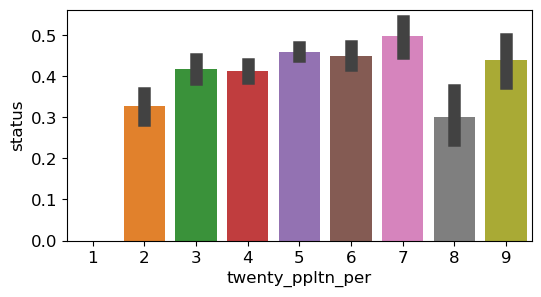

In [1082]:
# 20대 인구 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['twenty_ppltn_per'], y=final['status'])

<AxesSubplot:xlabel='one_person_family_per', ylabel='status'>

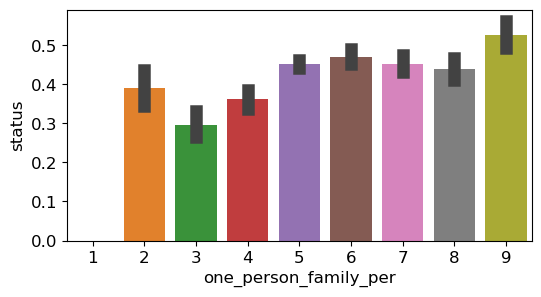

In [937]:
# 1인가구 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['one_person_family_per'], y=final['status'])

<AxesSubplot:xlabel='resid_ppltn_per', ylabel='status'>

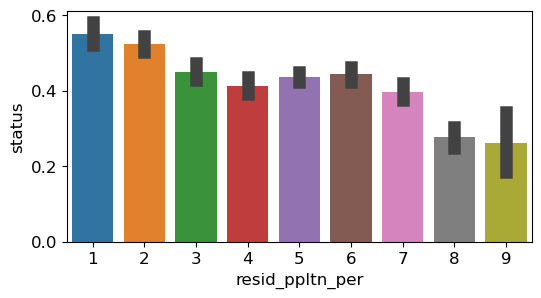

In [939]:
# 거주인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['resid_ppltn_per'], y=final['status'])

<AxesSubplot:xlabel='sixty_five_more_ppltn_per', ylabel='status'>

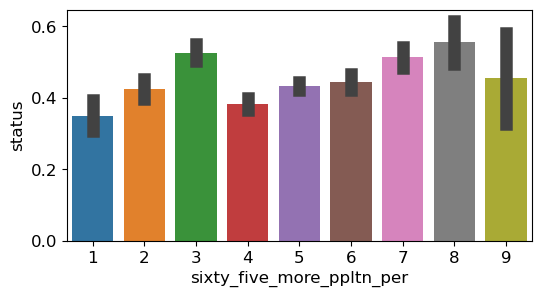

In [941]:
# 고령인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['sixty_five_more_ppltn_per'], y=final['status'])

<AxesSubplot:xlabel='apart', ylabel='status'>

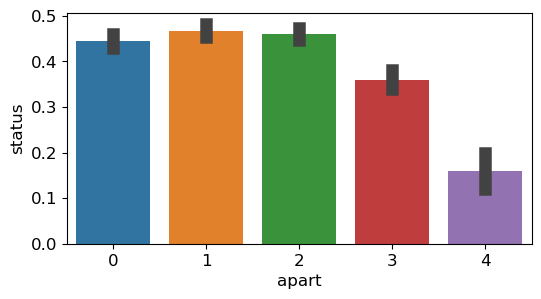

In [1140]:
# 아파트 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['apart'], y=final['status'])

<AxesSubplot:xlabel='job', ylabel='status'>

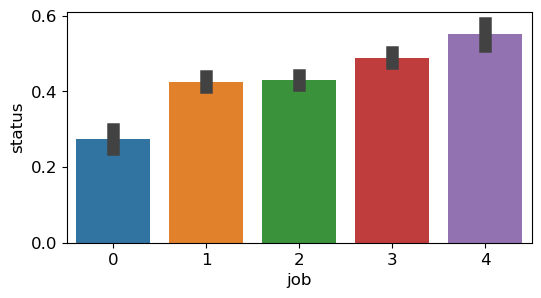

In [1143]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['job_ppltn_per'], y=final['status'])

<AxesSubplot:xlabel='status', ylabel='density_OtoC'>

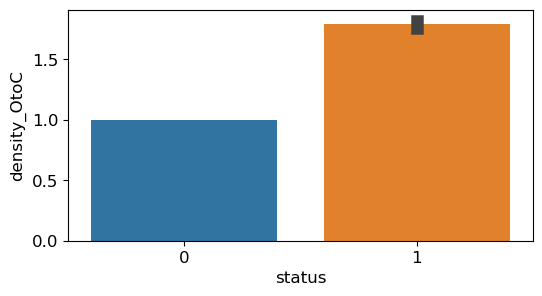

In [944]:
# 페업매장과 다른 매장과의 거리에 따른 폐업률 관계
sns.barplot(x=final['status'], y=final['density_OtoC'])

<AxesSubplot:xlabel='status', ylabel='density'>

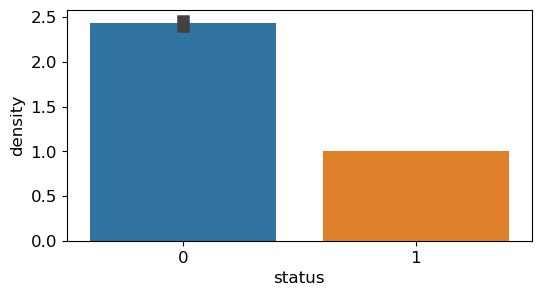

In [945]:
# 다른 매장과의 거리에 따른 페업률과의 관계
sns.barplot(x=final['status'], y=final['density'])

<AxesSubplot:xlabel='status', ylabel='pay'>

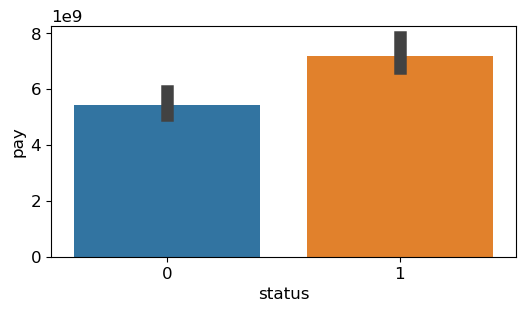

In [946]:
# 결제액과페업률과의 관계
sns.barplot(x=final['status'], y=final['pay'])

<AxesSubplot:xlabel='status', ylabel='count'>

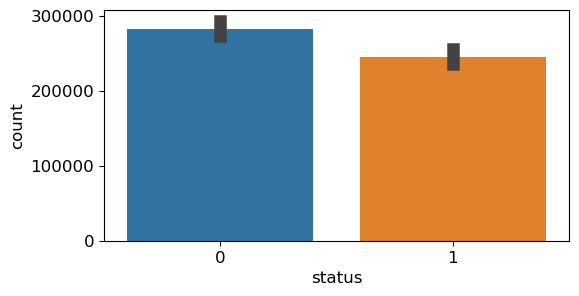

In [947]:
# 방문자와 폐업률과의 관계
sns.barplot(x=final['status'], y=final['count'])

<AxesSubplot:xlabel='status', ylabel='week'>

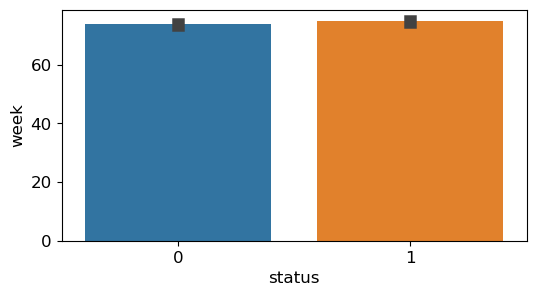

In [948]:
# 주중 매출액에 따른 페업률
sns.barplot(x=final['status'], y=final['week'])

<AxesSubplot:xlabel='status', ylabel='weekend'>

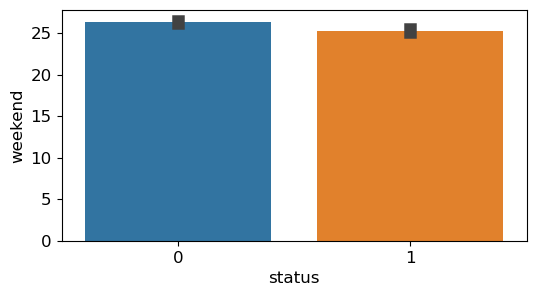

In [949]:
# 주말 비율에 따른 페업
sns.barplot(x=final['status'], y=final['weekend'])

<AxesSubplot:xlabel='status', ylabel='man'>

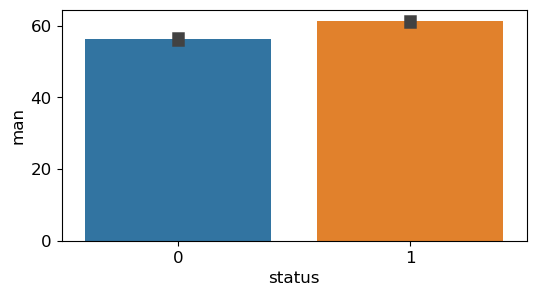

In [950]:
# 남자 매출에 따른 페업
sns.barplot(x=final['status'], y=final['man'])

<AxesSubplot:xlabel='status', ylabel='woman'>

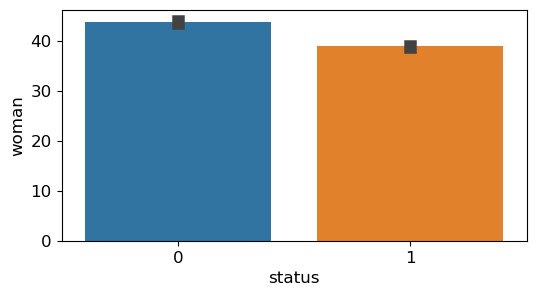

In [951]:
# 여성 매출에 따른 페업
sns.barplot(x=final['status'], y=final['woman'])

<AxesSubplot:xlabel='status', ylabel='day'>

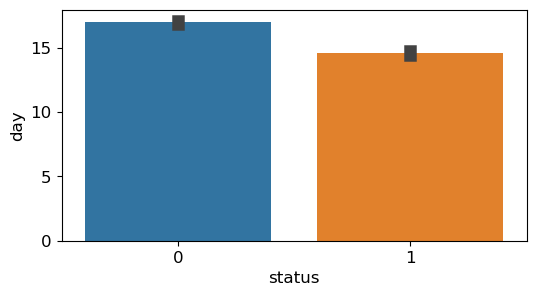

In [952]:
# 낮 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['status'], y=final['day'])

<AxesSubplot:xlabel='status', ylabel='night'>

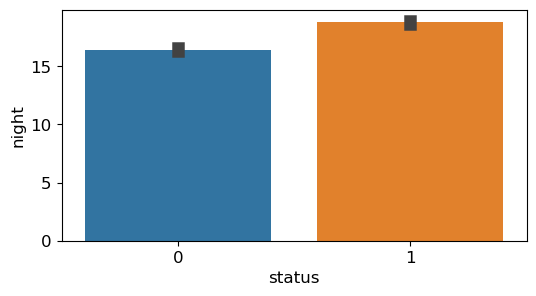

In [953]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['status'], y=final['night'])

In [954]:
final.shape

(16736, 18)

In [955]:
# 요약통계
final.describe() 

,category,status,twenty_ppltn_per,one_person_family_per,resid_ppltn_per,sixty_five_more_ppltn_per,apart_per,job_ppltn_per,density,density_OtoC,pay,count,week,weekend,man,woman,day,night
count,16736.000000,16736.000000,16736.000000,16736.000000,16736.000000,16736.000000,16736.000000,16736.000000,16736.000000,16736.000000,1.673600e+04,1.673600e+04,16736.000000,16736.000000,16736.000000,16736.000000,16736.000000,16736.000000
mean,2.210863,0.439113,4.779577,5.538002,4.632648,4.601816,4.289018,5.367352,1.802522,1.347275,6.197041e+09,2.659983e+05,74.244687,25.852168,58.498671,41.603519,15.932428,17.464594
std,2.520722,0.496294,1.246540,1.508938,1.933392,1.418907,2.033467,1.933392,1.307521,0.942368,2.424092e+10,5.094499e+05,7.939403,7.944766,9.772036,9.772008,6.531522,6.527021
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.805745e+06,3.600000e+01,26.333333,0.000000,15.250000,0.000000,0.000000,0.777778
25%,0.000000,0.000000,4.000000,5.000000,3.000000,4.000000,3.000000,4.000000,1.000000,1.000000,8.255656e+08,4.510467e+04,68.750000,20.208333,51.770833,34.375000,12.900000,12.687500
50%,1.000000,0.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,1.000000,1.000000,2.696482e+09,1.222198e+05,73.000000,27.083333,60.650000,39.500000,16.187500,17.197917
75%,4.000000,1.000000,5.000000,6.000000,6.000000,5.000000,6.000000,7.000000,3.000000,1.000000,6.893744e+09,3.126188e+05,79.875000,31.333333,65.750000,48.350000,20.694444,20.583333
max,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,7.000000,7.000000,2.029567e+12,2.857767e+07,100.000000,73.666667,100.000000,84.750000,32.666667,33.500000


In [956]:
# 컬럼별 상관관계
final.corr()

,category,status,twenty_ppltn_per,one_person_family_per,resid_ppltn_per,sixty_five_more_ppltn_per,apart_per,job_ppltn_per,density,density_OtoC,pay,count,week,weekend,man,woman,day,night
category,1.000000,0.025811,0.017341,0.012888,-0.015444,-0.007281,-0.000174,0.015444,-0.005477,0.010728,-0.124823,-0.253912,-0.148327,0.147909,-0.065461,0.065006,-0.238872,0.238259
status,0.025811,1.000000,0.039591,0.069996,-0.106449,0.029806,-0.058440,0.106449,-0.543090,0.416501,0.036043,-0.035492,0.066245,-0.066292,0.249106,-0.249092,-0.179434,0.179453
twenty_ppltn_per,0.017341,0.039591,1.000000,0.729109,-0.072799,-0.379394,-0.535736,0.072799,0.002878,0.062777,-0.050319,-0.048153,-0.067877,0.067546,-0.031780,0.031558,-0.108776,0.108840
one_person_family_per,0.012888,0.069996,0.729109,1.000000,-0.392432,-0.232617,-0.561533,0.392432,-0.088314,0.013033,0.025185,0.086766,0.148217,-0.148434,0.039804,-0.040183,-0.056195,0.056273
resid_ppltn_per,-0.015444,-0.106449,-0.072799,-0.392432,1.000000,0.177153,-0.016554,-1.000000,0.237013,0.131026,-0.156522,-0.315261,-0.553769,0.553729,-0.073988,0.074415,-0.145571,0.145942
sixty_five_more_ppltn_per,-0.007281,0.029806,-0.379394,-0.232617,0.177153,1.000000,-0.011825,-0.177153,0.058169,0.085992,-0.044807,-0.134867,-0.222424,0.222765,0.017575,-0.017584,-0.018769,0.018960
apart_per,-0.000174,-0.058440,-0.535736,-0.561533,-0.016554,-0.011825,1.000000,0.016554,0.037964,-0.077077,0.065990,0.099539,0.173510,-0.172984,0.025769,-0.025163,0.131867,-0.131921
job_ppltn_per,0.015444,0.106449,0.072799,0.392432,-1.000000,-0.177153,0.016554,1.000000,-0.237013,-0.131026,0.156522,0.315261,0.553769,-0.553729,0.073988,-0.074415,0.145571,-0.145942
density,-0.005477,-0.543090,0.002878,-0.088314,0.237013,0.058169,0.037964,-0.237013,1.000000,-0.226197,-0.048123,-0.057352,-0.154132,0.154473,-0.128699,0.129007,0.021662,-0.021584
density_OtoC,0.010728,0.416501,0.062777,0.013033,0.131026,0.085992,-0.077077,-0.131026,-0.226197,1.000000,-0.020460,-0.071237,-0.111831,0.111871,0.088679,-0.088677,-0.125118,0.125403


<AxesSubplot:xlabel='status', ylabel='count'>

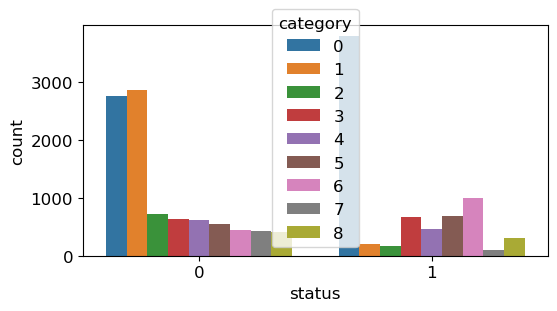

In [957]:
# 업종과 폐업률 관계 
# 기타 음식점은 너무 많은 종류의 음식점이 산재해있어 정확한 예측에 도움이 되지 않을 것이라 판단하여 제외
sns.countplot(x=final['status'], hue=final['category'])

In [1085]:
# 금액 구간화
final['pay'].describe()

count    1.673600e+04
mean     6.197041e+09
std      2.424092e+10
min      4.805745e+06
25%      8.255656e+08
50%      2.696482e+09
75%      6.893744e+09
max      2.029567e+12
Name: pay, dtype: float64

In [1086]:
(8.255656e+08,  2.696482e+09, 6.893744e+09, 2.029567e+12)

(825565600.0, 2696482000.0, 6893744000.0, 2029567000000.0)

In [1087]:
len(final[final['pay'] > 10893744000.0])

2386

In [1088]:
def fare_categorize(v):
    if v <= 825565600.0:
        return 0
    elif v <= 2696482000.0:
        return 1
    elif v <= 6893744000.0:
        return 2
    elif v <= 10893744000.0:
        return 3
    else:
        return 4

final['pay2'] = final['pay'].apply(fare_categorize)
final[['pay','pay2']]

,pay,pay2
0,8.906484e+09,3
1,7.130239e+09,3
2,7.130239e+09,3
3,4.530824e+09,2
4,8.906484e+09,3
...,...,...
16731,1.363359e+10,4
16732,1.363359e+10,4
16733,1.363359e+10,4
16734,3.942609e+09,2


In [1089]:
# 방문자수 구간화
final['count'].describe()

count    1.673600e+04
mean     2.659983e+05
std      5.094499e+05
min      3.600000e+01
25%      4.510467e+04
50%      1.222198e+05
75%      3.126188e+05
max      2.857767e+07
Name: count, dtype: float64

In [1090]:
(4.510467e+04, 1.222198e+05, 3.126188e+05, 2.857767e+07)

(45104.67, 122219.8, 312618.8, 28577670.0)

In [1091]:
len(final[final['count'] > 612618.8])

2005

In [1092]:
def fare_categorize(v):
    if v <= 45104.67:
        return 0
    elif v <= 122219.8:
        return 1
    elif v <= 312618.8:
        return 2
    elif v <= 612618.8:
        return 3
    else:
        return 4

final['count2'] = final['count'].apply(fare_categorize)
final[['count','count2']]

,count,count2
0,316615.923077,3
1,711078.846154,4
2,711078.846154,4
3,126688.666667,2
4,316615.923077,3
...,...,...
16731,346922.500000,3
16732,346922.500000,3
16733,346922.500000,3
16734,94519.000000,1


In [1093]:
# 주중 매출비율 구간화
final['week'].describe()

count    16736.000000
mean        74.244687
std          7.939403
min         26.333333
25%         68.750000
50%         73.000000
75%         79.875000
max        100.000000
Name: week, dtype: float64

In [1094]:
len(final[final['week'] > 84.505000])

2130

In [1095]:
def fare_categorize(v):
    if v <= 68.750000:
        return 0
    elif v <= 73.000000:
        return 1
    elif v <= 79.875000:
        return 2
    elif v <= 84.505000:
        return 3
    else:
        return 4

final['week2'] = final['week'].apply(fare_categorize)
final[['week','week2']]

,week,week2
0,72.403846,1
1,69.769048,1
2,69.769048,1
3,66.506944,0
4,72.403846,1
...,...,...
16731,95.250000,4
16732,95.250000,4
16733,95.250000,4
16734,89.750000,4


In [1096]:
# 주말 매출비율 구간화
final['weekend'].describe()

count    16736.000000
mean        25.852168
std          7.944766
min          0.000000
25%         20.208333
50%         27.083333
75%         31.333333
max         73.666667
Name: weekend, dtype: float64

In [1097]:
len(final[final['weekend'] > 34.233333])

2057

In [1098]:
def fare_categorize(v):
    if v <= 20.208333:
        return 0
    elif v <= 27.083333:
        return 1
    elif v <= 31.333333:
        return 2
    elif v <= 34.233333:
        return 3
    else:
        return 4

final['weekend2'] = final['weekend'].apply(fare_categorize)
final[['weekend','weekend2']]

,weekend,weekend2
0,27.634615,2
1,30.371337,2
2,30.371337,2
3,33.659722,3
4,27.634615,2
...,...,...
16731,4.875000,0
16732,4.875000,0
16733,4.875000,0
16734,10.375000,0


In [1099]:
# 남자 매출비율 구간화
final['man'].describe()

count    16736.000000
mean        58.498671
std          9.772036
min         15.250000
25%         51.770833
50%         60.650000
75%         65.750000
max        100.000000
Name: man, dtype: float64

In [1100]:
len(final[final['man'] > 68.400000])

2031

In [1101]:
def fare_categorize(v):
    if v <= 51.770833:
        return 0
    elif v <= 60.650000:
        return 1
    elif v <= 65.750000:
        return 2
    elif v <= 68.400000:
        return 3
    else:
        return 4

final['man2'] = final['man'].apply(fare_categorize)
final[['man','man2']]

,man,man2
0,59.057692,1
1,38.996154,0
2,38.996154,0
3,56.541667,1
4,59.057692,1
...,...,...
16731,61.375000,2
16732,61.375000,2
16733,61.375000,2
16734,65.125000,2


In [1102]:
# 여자 매출비율 구간화
final['woman'].describe()

count    16736.000000
mean        41.603519
std          9.772008
min          0.000000
25%         34.375000
50%         39.500000
75%         48.350000
max         84.750000
Name: woman, dtype: float64

In [1103]:
len(final[final['woman'] > 54.950000])

2058

In [1104]:
def fare_categorize(v):
    if v <= 34.375000:
        return 0
    elif v <= 39.500000:
        return 1
    elif v <= 48.350000:
        return 2
    elif v <= 54.950000:
        return 3
    else:
        return 4

final['woman2'] = final['woman'].apply(fare_categorize)
final[['woman','woman2']]

,woman,woman2
0,41.057692,2
1,61.100000,4
2,61.100000,4
3,43.541667,2
4,41.057692,2
...,...,...
16731,38.875000,1
16732,38.875000,1
16733,38.875000,1
16734,34.875000,1


In [1105]:
# 주간 매출비율 구간화
final['day'].describe()

count    16736.000000
mean        15.932428
std          6.531522
min          0.000000
25%         12.900000
50%         16.187500
75%         20.694444
max         32.666667
Name: day, dtype: float64

In [1106]:
len(final[final['day'] > 23.454444])

2053

In [1107]:
def fare_categorize(v):
    if v <= 12.900000:
        return 0
    elif v <= 16.187500:
        return 1
    elif v <= 20.694444:
        return 2
    elif v <= 23.454444:
        return 3
    else:
        return 4

final['day2'] = final['day'].apply(fare_categorize)
final[['day','day2']]

,day,day2
0,13.051282,1
1,22.776129,3
2,22.776129,3
3,2.979167,0
4,13.051282,1
...,...,...
16731,23.041667,3
16732,23.041667,3
16733,23.041667,3
16734,14.500000,1


In [1108]:
# 야간 매출 구간화
final['night'].describe()

count    16736.000000
mean        17.464594
std          6.527021
min          0.777778
25%         12.687500
50%         17.197917
75%         20.583333
max         33.500000
Name: night, dtype: float64

In [1109]:
len(final[final['night'] > 26.583333])

2105

In [1110]:
def fare_categorize(v):
    if v <= 12.687500:
        return 0
    elif v <= 17.197917:
        return 1
    elif v <= 20.583333:
        return 2
    elif v <= 26.583333:
        return 3
    else:
        return 4

final['night2'] = final['night'].apply(fare_categorize)
final[['night','night2']]

,night,night2
0,20.301282,2
1,10.656349,0
2,10.656349,0
3,30.444444,4
4,20.301282,2
...,...,...
16731,10.333333,0
16732,10.333333,0
16733,10.333333,0
16734,18.958333,2


In [1111]:
final.drop(['pay','count','week','weekend','man','woman','day','night'], axis=1, inplace=True)

In [1112]:
final

,category,status,twenty_ppltn_per,one_person_family_per,resid_ppltn_per,sixty_five_more_ppltn_per,apart_per,job_ppltn_per,density,density_OtoC,pay2,count2,week2,weekend2,man2,woman2,day2,night2
0,0,0,6,7,2,4,3,8,2.0,1.0,3,3,1,2,1,2,1,2
1,1,0,6,7,2,4,3,8,1.0,1.0,3,4,1,2,0,4,3,0
2,1,0,6,7,2,4,3,8,2.0,1.0,3,4,1,2,0,4,3,0
3,2,0,6,7,2,4,3,8,2.0,1.0,2,2,0,3,1,2,0,4
4,0,0,6,7,2,4,3,8,0.0,1.0,3,3,1,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16731,4,1,3,2,3,3,8,7,1.0,1.0,4,3,4,0,2,1,3,0
16732,4,1,3,2,3,3,8,7,1.0,1.0,4,3,4,0,2,1,3,0
16733,4,1,3,2,3,3,8,7,1.0,1.0,4,3,4,0,2,1,3,0
16734,5,1,3,2,3,3,8,7,1.0,2.0,2,1,4,0,2,1,1,2


In [1113]:
final['one_person_family_per'].value_counts()

5    7086
6    2668
7    2200
4    1723
8    1203
9     719
3     644
2     434
1      59
Name: one_person_family_per, dtype: int64

In [1114]:
def fare_categorize(v):
    if v <= 2:
        return 0
    elif v <= 4:
        return 1
    elif v <= 6:
        return 2
    elif v <= 8:
        return 3
    elif v <= 9:
        return 4

In [1115]:
final['twenty'] = final['twenty_ppltn_per'].apply(fare_categorize)
final[['twenty_ppltn_per','twenty']]

,twenty_ppltn_per,twenty
0,6,2
1,6,2
2,6,2
3,6,2
4,6,2
...,...,...
16731,3,1
16732,3,1
16733,3,1
16734,3,1


In [1116]:
final['one_person'] = final['one_person_family_per'].apply(fare_categorize)
final[['one_person_family_per','one_person']]

,one_person_family_per,one_person
0,7,3
1,7,3
2,7,3
3,7,3
4,7,3
...,...,...
16731,2,0
16732,2,0
16733,2,0
16734,2,0


In [1117]:
final['resid'] = final['resid_ppltn_per'].apply(fare_categorize)
final[['resid_ppltn_per','resid']]

,resid_ppltn_per,resid
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
...,...,...
16731,3,1
16732,3,1
16733,3,1
16734,3,1


In [1118]:
final['apart'] = final['apart_per'].apply(fare_categorize)
final[['apart_per','apart']]

,apart_per,apart
0,3,1
1,3,1
2,3,1
3,3,1
4,3,1
...,...,...
16731,8,3
16732,8,3
16733,8,3
16734,8,3


In [1119]:
final['job'] = final['job_ppltn_per'].apply(fare_categorize)
final[['job_ppltn_per','job']]

,job_ppltn_per,job
0,8,3
1,8,3
2,8,3
3,8,3
4,8,3
...,...,...
16731,7,3
16732,7,3
16733,7,3
16734,7,3


In [1120]:
final['sixty'] = final['sixty_five_more_ppltn_per'].apply(fare_categorize)
final[['sixty_five_more_ppltn_per','sixty']]

,sixty_five_more_ppltn_per,sixty
0,4,1
1,4,1
2,4,1
3,4,1
4,4,1
...,...,...
16731,3,1
16732,3,1
16733,3,1
16734,3,1


In [1121]:
final.drop(['sixty_five_more_ppltn_per','twenty_ppltn_per','one_person_family_per','resid_ppltn_per','apart_per','job_ppltn_per'], axis=1, inplace=True)

In [1122]:
# 카테고리 원핫 인코딩
r = pd.get_dummies(final['category'])
r.columns=['ko','ds','dr','s','jp','w','c','f','chi']
final = pd.concat([final, r], axis=1)

<AxesSubplot:xlabel='twenty', ylabel='status'>

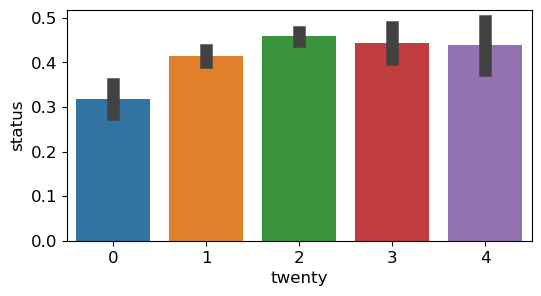

In [1145]:
# 20대 인구 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['twenty'], y=final['status'])

<AxesSubplot:xlabel='one_person', ylabel='status'>

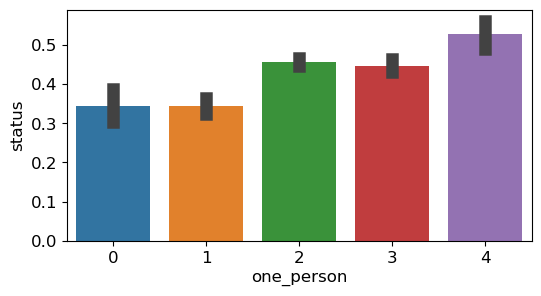

In [1146]:
# 1인가구 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['one_person'], y=final['status'])

<AxesSubplot:xlabel='resid', ylabel='status'>

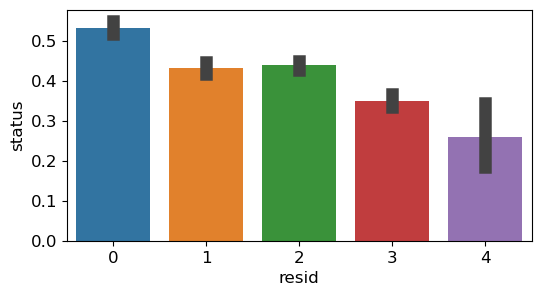

In [1147]:
# 거주인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['resid'], y=final['status'])

<AxesSubplot:xlabel='sixty', ylabel='status'>

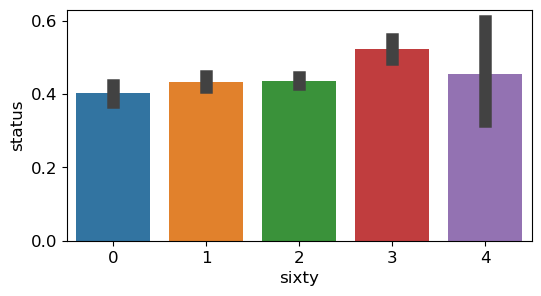

In [1148]:
# 고령인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['sixty'], y=final['status'])

<AxesSubplot:xlabel='job', ylabel='status'>

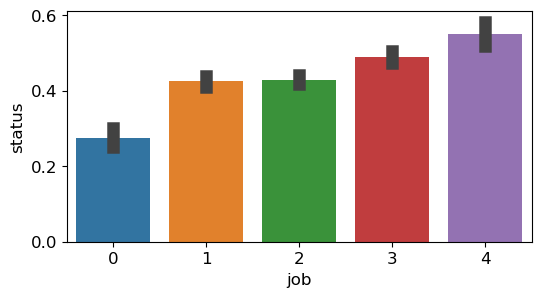

In [1149]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['job'], y=final['status'])

<AxesSubplot:xlabel='apart', ylabel='status'>

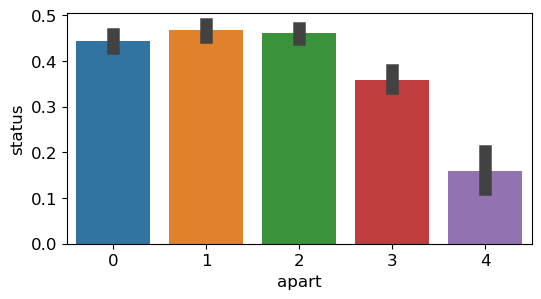

In [1151]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['apart'], y=final['status'])

<AxesSubplot:xlabel='pay2', ylabel='status'>

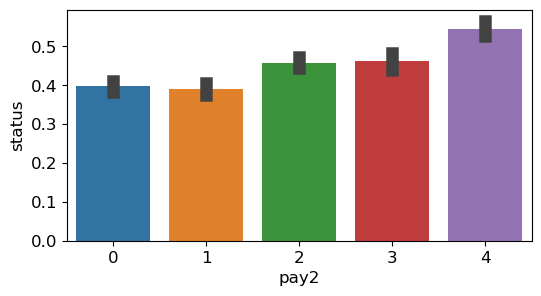

In [1152]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['pay2'], y=final['status'])

<AxesSubplot:xlabel='count2', ylabel='status'>

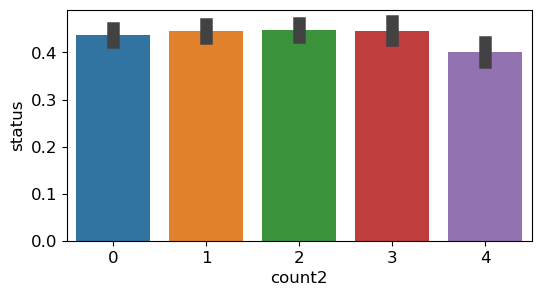

In [1164]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['count2'], y=final['status'])

<AxesSubplot:xlabel='week2', ylabel='status'>

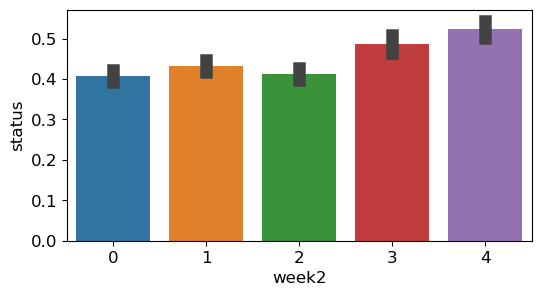

In [1165]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['week2'], y=final['status'])

<AxesSubplot:xlabel='weekend2', ylabel='status'>

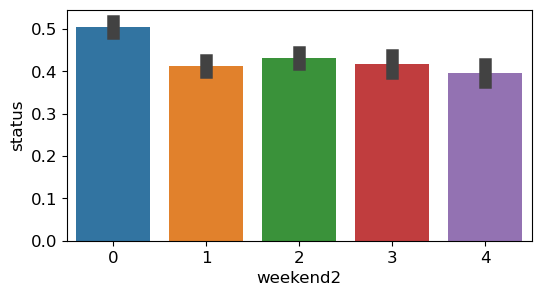

In [1166]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['weekend2'], y=final['status'])

<AxesSubplot:xlabel='man2', ylabel='status'>

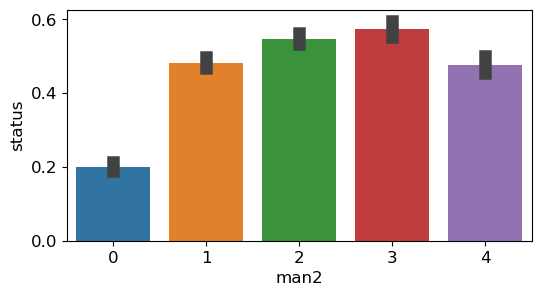

In [1167]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['man2'], y=final['status'])

<AxesSubplot:xlabel='woman2', ylabel='status'>

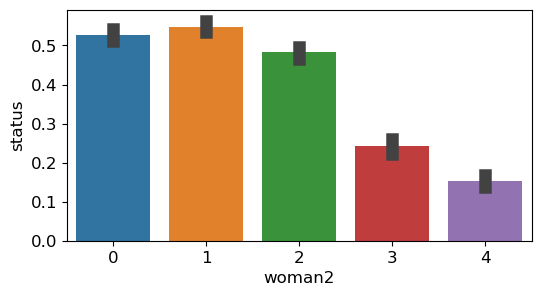

In [1168]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['woman2'], y=final['status'])

<AxesSubplot:xlabel='day2', ylabel='status'>

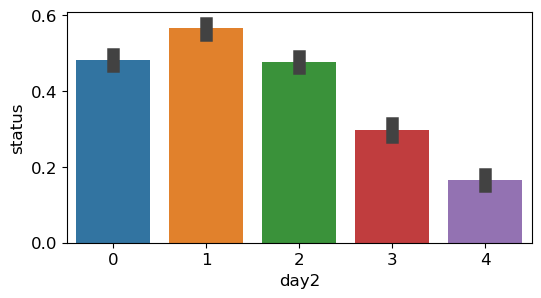

In [1169]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['day2'], y=final['status'])

<AxesSubplot:xlabel='night2', ylabel='status'>

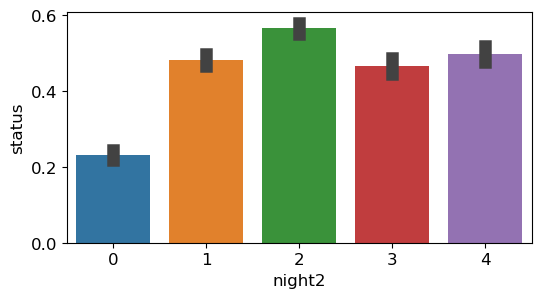

In [1170]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['night2'], y=final['status'])

<AxesSubplot:xlabel='status', ylabel='density'>

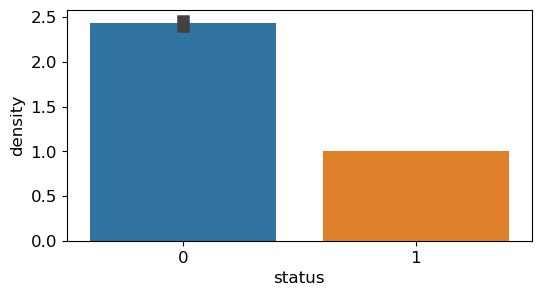

In [1174]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['status'], y=final['density'])

<AxesSubplot:xlabel='status', ylabel='density_OtoC'>

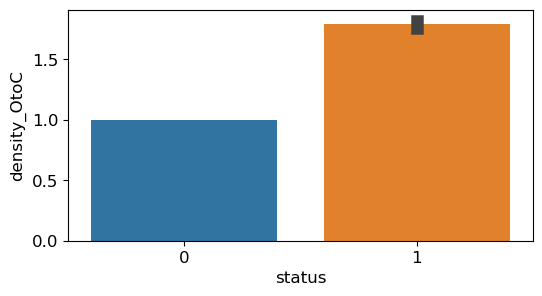

In [1173]:
# 직장인구 비율 퍼센트에 따른 폐업률 관계
sns.barplot(x=final['status'], y=final['density_OtoC'])

ML

In [1175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [1176]:
# 테스트데이터와 학습데이터 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final.drop('status', axis=1), final['status'])

In [1178]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12552, 26), (4184, 26), (12552,), (4184,))

In [1187]:
# 교차검증
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
score = cross_val_score(model, final.drop('status', axis=1), final['status'], cv=10)
score.mean()

0.8513442824078539

In [1188]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
# 정확도 : accuracy
(pred==y_test).mean()

0.9201720841300192

In [1183]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)
# 정확도 : accuracy
(pred==y_test).mean()

0.8812141491395793

In [1189]:
#가우시안
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
# 정확도 : accuracy
(pred==y_test).mean()

0.9170650095602294

In [1191]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
# 정확도 : accuracy
(pred==y_test).mean()

0.9199330783938815

In [1192]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
# 정확도 : accuracy
(pred==y_test).mean()

0.9206500956022945

In [1193]:
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2251
           1       0.94      0.88      0.91      1933

    accuracy                           0.92      4184
   macro avg       0.92      0.92      0.92      4184
weighted avg       0.92      0.92      0.92      4184



In [1186]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, y_test)

array([[2064,   40],
       [ 307, 1773]])